# Plotting

In [1]:
from pandas.tseries import converter as pdtc
pdtc.register()

In [2]:
from pandas.tseries import converter as pdtc
import matplotlib.units as munits
import numpy as np

munits.registry[np.datetime64] = pdtc.DatetimeConverter()

In [7]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_subplot(2,1,1)

In [8]:
def myfunc(x):
    return hasattr(x, 'set_color')

for o in fig.findobj(myfunc):
    o.set_color('blue')

In [9]:
fig2 = plt.figure()
ax2 = fig2.add_axes([0.15, 0.1, 0.7, 0.3])

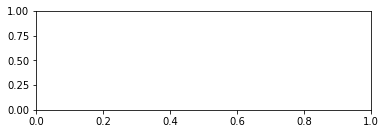

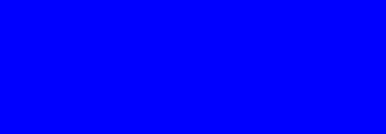

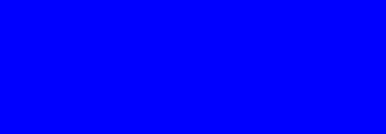

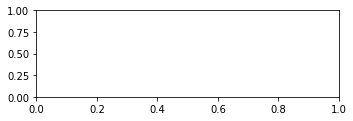

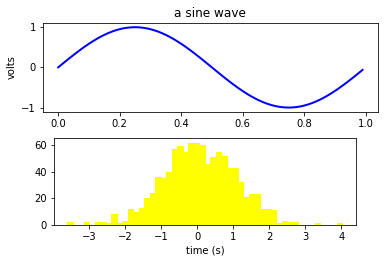

In [10]:
import numpy as np
import matplotlib.pyplot as plt

fig = plt.figure()
fig.subplots_adjust(top=0.8)
ax1 = fig.add_subplot(211)
ax1.set_ylabel('volts')
ax1.set_title('a sine wave')

t = np.arange(0.0, 1.0, 0.01)
s = np.sin(2*np.pi*t)
line, = ax1.plot(t, s, color='blue', lw=2)

# Fixing random state for reproducibility
np.random.seed(19680801)

ax2 = fig.add_axes([0.15, 0.1, 0.7, 0.3])
n, bins, patches = ax2.hist(np.random.randn(1000), 50,
                            facecolor='yellow', edgecolor='yellow')
ax2.set_xlabel('time (s)')

plt.show()

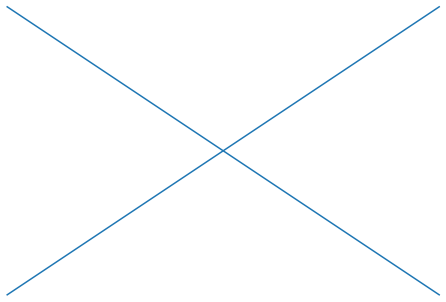

In [17]:
import matplotlib.lines as lines

fig = plt.figure()

l1 = lines.Line2D([0, 1], [0, 1], transform=fig.transFigure, figure=fig)
l2 = lines.Line2D([0, 1], [1, 0], transform=fig.transFigure, figure=fig)
fig.lines.extend([l1, l2])

plt.show()

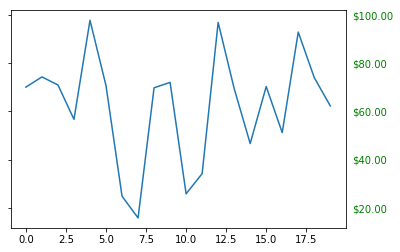

In [18]:
import matplotlib.ticker as ticker

# Fixing random state for reproducibility
np.random.seed(19680801)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(100*np.random.rand(20))

formatter = ticker.FormatStrFormatter('$%1.2f')
ax.yaxis.set_major_formatter(formatter)

for tick in ax.yaxis.get_major_ticks():
    tick.label1On = False
    tick.label2On = True
    tick.label2.set_color('green')

plt.show()

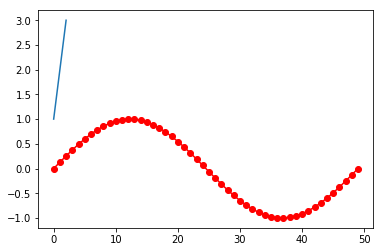

In [21]:
import numpy as np
import matplotlib.pyplot as plt

with plt.style.context(('dark_background')):
    plt.plot(np.sin(np.linspace(0, 2 * np.pi)), 'r-o')

 # Some plotting code with the default style

    plt.show()

# pyplot

In [22]:
import numpy as np
import matplotlib.pyplot as plt

x = np.arange(0, 5, 0.1);
y = np.sin(x)
plt.plot(x, y)

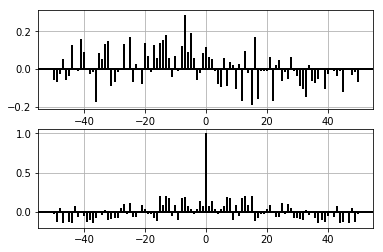

In [25]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

x, y = np.random.randn(2, 100)
fig = plt.figure()
ax1 = fig.add_subplot(211)
ax1.xcorr(x, y, usevlines=True, maxlags=50, normed=True, lw=2)
ax1.grid(True)
ax1.axhline(0, color='black', lw=2)

ax2 = fig.add_subplot(212, sharex=ax1)
ax2.acorr(x, usevlines=True, normed=True, maxlags=50, lw=2)
ax2.grid(True)
ax2.axhline(0, color='black', lw=2)

plt.show()


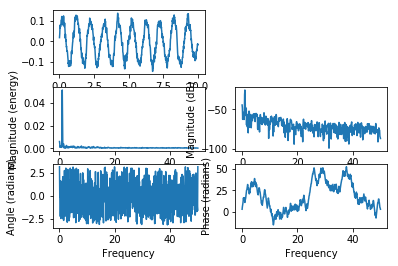

In [26]:
import matplotlib.pyplot as plt
import numpy as np


np.random.seed(0)

dt = 0.01
Fs = 1/dt
t = np.arange(0, 10, dt)
nse = np.random.randn(len(t))
r = np.exp(-t/0.05)

cnse = np.convolve(nse, r)*dt
cnse = cnse[:len(t)]
s = 0.1*np.sin(2*np.pi*t) + cnse

plt.subplot(3, 2, 1)
plt.plot(t, s)

plt.subplot(3, 2, 3)
plt.magnitude_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 4)
plt.magnitude_spectrum(s, Fs=Fs, scale='dB')

plt.subplot(3, 2, 5)
plt.angle_spectrum(s, Fs=Fs)

plt.subplot(3, 2, 6)
plt.phase_spectrum(s, Fs=Fs)

plt.show()


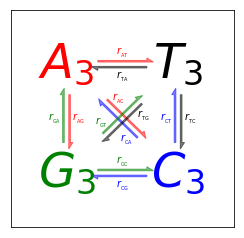

In [27]:
"""Arrow drawing example for the new fancy_arrow facilities.

Code contributed by: Rob Knight <rob@spot.colorado.edu>

usage:

  python arrow_demo.py realistic|full|sample|extreme


"""
import matplotlib.pyplot as plt
import numpy as np

rates_to_bases = {'r1': 'AT', 'r2': 'TA', 'r3': 'GA', 'r4': 'AG', 'r5': 'CA',
                  'r6': 'AC', 'r7': 'GT', 'r8': 'TG', 'r9': 'CT', 'r10': 'TC',
                  'r11': 'GC', 'r12': 'CG'}
numbered_bases_to_rates = dict([(v, k) for k, v in rates_to_bases.items()])
lettered_bases_to_rates = dict([(v, 'r' + v) for k, v in rates_to_bases.items()])


def add_dicts(d1, d2):
    """Adds two dicts and returns the result."""
    result = d1.copy()
    result.update(d2)
    return result


def make_arrow_plot(data, size=4, display='length', shape='right',
                    max_arrow_width=0.03, arrow_sep=0.02, alpha=0.5,
                    normalize_data=False, ec=None, labelcolor=None,
                    head_starts_at_zero=True, rate_labels=lettered_bases_to_rates,
                    **kwargs):
    """Makes an arrow plot.

    Parameters:

    data: dict with probabilities for the bases and pair transitions.
    size: size of the graph in inches.
    display: 'length', 'width', or 'alpha' for arrow property to change.
    shape: 'full', 'left', or 'right' for full or half arrows.
    max_arrow_width: maximum width of an arrow, data coordinates.
    arrow_sep: separation between arrows in a pair, data coordinates.
    alpha: maximum opacity of arrows, default 0.8.

    **kwargs can be anything allowed by a Arrow object, e.g.
    linewidth and edgecolor.
    """

    plt.xlim(-0.5, 1.5)
    plt.ylim(-0.5, 1.5)
    plt.gcf().set_size_inches(size, size)
    plt.xticks([])
    plt.yticks([])
    max_text_size = size*12
    min_text_size = size
    label_text_size = size*2.5
    text_params = {'ha': 'center', 'va': 'center', 'family': 'sans-serif',
                   'fontweight': 'bold'}
    r2 = np.sqrt(2)

    deltas = {
        'AT': (1, 0),
        'TA': (-1, 0),
        'GA': (0, 1),
        'AG': (0, -1),
        'CA': (-1/r2, 1/r2),
        'AC': (1/r2, -1/r2),
        'GT': (1/r2, 1/r2),
        'TG': (-1/r2, -1/r2),
        'CT': (0, 1),
        'TC': (0, -1),
        'GC': (1, 0),
        'CG': (-1, 0)
        }

    colors = {
        'AT': 'r',
        'TA': 'k',
        'GA': 'g',
        'AG': 'r',
        'CA': 'b',
        'AC': 'r',
        'GT': 'g',
        'TG': 'k',
        'CT': 'b',
        'TC': 'k',
        'GC': 'g',
        'CG': 'b'
        }

    label_positions = {
        'AT': 'center',
        'TA': 'center',
        'GA': 'center',
        'AG': 'center',
        'CA': 'left',
        'AC': 'left',
        'GT': 'left',
        'TG': 'left',
        'CT': 'center',
        'TC': 'center',
        'GC': 'center',
        'CG': 'center'
        }

    def do_fontsize(k):
        return float(np.clip(max_text_size*np.sqrt(data[k]),
                          min_text_size, max_text_size))

    A = plt.text(0, 1, '$A_3$', color='r', size=do_fontsize('A'), **text_params)
    T = plt.text(1, 1, '$T_3$', color='k', size=do_fontsize('T'), **text_params)
    G = plt.text(0, 0, '$G_3$', color='g', size=do_fontsize('G'), **text_params)
    C = plt.text(1, 0, '$C_3$', color='b', size=do_fontsize('C'), **text_params)

    arrow_h_offset = 0.25  # data coordinates, empirically determined
    max_arrow_length = 1 - 2*arrow_h_offset

    max_arrow_width = max_arrow_width
    max_head_width = 2.5*max_arrow_width
    max_head_length = 2*max_arrow_width
    arrow_params = {'length_includes_head': True, 'shape': shape,
                    'head_starts_at_zero': head_starts_at_zero}
    ax = plt.gca()
    sf = 0.6  # max arrow size represents this in data coords

    d = (r2/2 + arrow_h_offset - 0.5)/r2  # distance for diags
    r2v = arrow_sep/r2  # offset for diags

    # tuple of x, y for start position
    positions = {
        'AT': (arrow_h_offset, 1 + arrow_sep),
        'TA': (1 - arrow_h_offset, 1 - arrow_sep),
        'GA': (-arrow_sep, arrow_h_offset),
        'AG': (arrow_sep, 1 - arrow_h_offset),
        'CA': (1 - d - r2v, d - r2v),
        'AC': (d + r2v, 1 - d + r2v),
        'GT': (d - r2v, d + r2v),
        'TG': (1 - d + r2v, 1 - d - r2v),
        'CT': (1 - arrow_sep, arrow_h_offset),
        'TC': (1 + arrow_sep, 1 - arrow_h_offset),
        'GC': (arrow_h_offset, arrow_sep),
        'CG': (1 - arrow_h_offset, -arrow_sep),
        }

    if normalize_data:
        # find maximum value for rates, i.e. where keys are 2 chars long
        max_val = 0
        for k, v in data.items():
            if len(k) == 2:
                max_val = max(max_val, v)
        # divide rates by max val, multiply by arrow scale factor
        for k, v in data.items():
            data[k] = v/max_val*sf

    def draw_arrow(pair, alpha=alpha, ec=ec, labelcolor=labelcolor):
        # set the length of the arrow
        if display == 'length':
            length = max_head_length + data[pair]/sf*(max_arrow_length -
                                                      max_head_length)
        else:
            length = max_arrow_length
        # set the transparency of the arrow
        if display == 'alph':
            alpha = min(data[pair]/sf, alpha)
        else:
            alpha = alpha
        # set the width of the arrow
        if display == 'width':
            scale = data[pair]/sf
            width = max_arrow_width*scale
            head_width = max_head_width*scale
            head_length = max_head_length*scale
        else:
            width = max_arrow_width
            head_width = max_head_width
            head_length = max_head_length

        fc = colors[pair]
        ec = ec or fc

        x_scale, y_scale = deltas[pair]
        x_pos, y_pos = positions[pair]
        plt.arrow(x_pos, y_pos, x_scale*length, y_scale*length,
              fc=fc, ec=ec, alpha=alpha, width=width, head_width=head_width,
              head_length=head_length, **arrow_params)

        # figure out coordinates for text
        # if drawing relative to base: x and y are same as for arrow
        # dx and dy are one arrow width left and up
        # need to rotate based on direction of arrow, use x_scale and y_scale
        # as sin x and cos x?
        sx, cx = y_scale, x_scale

        where = label_positions[pair]
        if where == 'left':
            orig_position = 3*np.array([[max_arrow_width, max_arrow_width]])
        elif where == 'absolute':
            orig_position = np.array([[max_arrow_length/2.0, 3*max_arrow_width]])
        elif where == 'right':
            orig_position = np.array([[length - 3*max_arrow_width,
                                    3*max_arrow_width]])
        elif where == 'center':
            orig_position = np.array([[length/2.0, 3*max_arrow_width]])
        else:
            raise ValueError("Got unknown position parameter %s" % where)

        M = np.array([[cx, sx], [-sx, cx]])
        coords = np.dot(orig_position, M) + [[x_pos, y_pos]]
        x, y = np.ravel(coords)
        orig_label = rate_labels[pair]
        label = '$%s_{_{\mathrm{%s}}}$' % (orig_label[0], orig_label[1:])

        plt.text(x, y, label, size=label_text_size, ha='center', va='center',
             color=labelcolor or fc)

    for p in sorted(positions):
        draw_arrow(p)

# test data
all_on_max = dict([(i, 1) for i in 'TCAG'] +
                  [(i + j, 0.6) for i in 'TCAG' for j in 'TCAG'])

realistic_data = {
    'A': 0.4,
    'T': 0.3,
    'G': 0.5,
    'C': 0.2,
    'AT': 0.4,
    'AC': 0.3,
    'AG': 0.2,
    'TA': 0.2,
    'TC': 0.3,
    'TG': 0.4,
    'CT': 0.2,
    'CG': 0.3,
    'CA': 0.2,
    'GA': 0.1,
    'GT': 0.4,
    'GC': 0.1,
    }

extreme_data = {
    'A': 0.75,
    'T': 0.10,
    'G': 0.10,
    'C': 0.05,
    'AT': 0.6,
    'AC': 0.3,
    'AG': 0.1,
    'TA': 0.02,
    'TC': 0.3,
    'TG': 0.01,
    'CT': 0.2,
    'CG': 0.5,
    'CA': 0.2,
    'GA': 0.1,
    'GT': 0.4,
    'GC': 0.2,
    }

sample_data = {
    'A': 0.2137,
    'T': 0.3541,
    'G': 0.1946,
    'C': 0.2376,
    'AT': 0.0228,
    'AC': 0.0684,
    'AG': 0.2056,
    'TA': 0.0315,
    'TC': 0.0629,
    'TG': 0.0315,
    'CT': 0.1355,
    'CG': 0.0401,
    'CA': 0.0703,
    'GA': 0.1824,
    'GT': 0.0387,
    'GC': 0.1106,
    }


if __name__ == '__main__':
    from sys import argv
    d = None
    if len(argv) > 1:
        if argv[1] == 'full':
            d = all_on_max
            scaled = False
        elif argv[1] == 'extreme':
            d = extreme_data
            scaled = False
        elif argv[1] == 'realistic':
            d = realistic_data
            scaled = False
        elif argv[1] == 'sample':
            d = sample_data
            scaled = True
    if d is None:
        d = all_on_max
        scaled = False
    if len(argv) > 2:
        display = argv[2]
    else:
        display = 'length'

    size = 4
    plt.figure(figsize=(size, size))

    make_arrow_plot(d, display=display, linewidth=0.001, edgecolor=None,
                    normalize_data=scaled, head_starts_at_zero=True, size=size)

    plt.draw()

    plt.show()


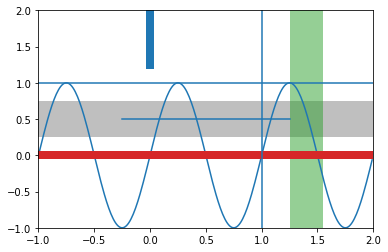

In [28]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-1, 2, .01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
# draw a thick red hline at y=0 that spans the xrange
l = plt.axhline(linewidth=8, color='#d62728')

# draw a default hline at y=1 that spans the xrange
l = plt.axhline(y=1)

# draw a default vline at x=1 that spans the yrange
l = plt.axvline(x=1)

# draw a thick blue vline at x=0 that spans the upper quadrant of
# the yrange
l = plt.axvline(x=0, ymin=0.75, linewidth=8, color='#1f77b4')

# draw a default hline at y=.5 that spans the middle half of
# the axes
l = plt.axhline(y=.5, xmin=0.25, xmax=0.75)

p = plt.axhspan(0.25, 0.75, facecolor='0.5', alpha=0.5)

p = plt.axvspan(1.25, 1.55, facecolor='#2ca02c', alpha=0.5)

plt.axis([-1, 2, -1, 2])


plt.show()


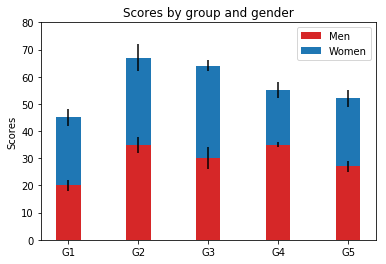

In [29]:
# a stacked bar plot with errorbars
import numpy as np
import matplotlib.pyplot as plt


N = 5
menMeans = (20, 35, 30, 35, 27)
womenMeans = (25, 32, 34, 20, 25)
menStd = (2, 3, 4, 1, 2)
womenStd = (3, 5, 2, 3, 3)
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, menMeans, width, color='#d62728', yerr=menStd)
p2 = plt.bar(ind, womenMeans, width,
             bottom=menMeans, yerr=womenStd)

plt.ylabel('Scores')
plt.title('Scores by group and gender')
plt.xticks(ind, ('G1', 'G2', 'G3', 'G4', 'G5'))
plt.yticks(np.arange(0, 81, 10))
plt.legend((p1[0], p2[0]), ('Men', 'Women'))

plt.show()


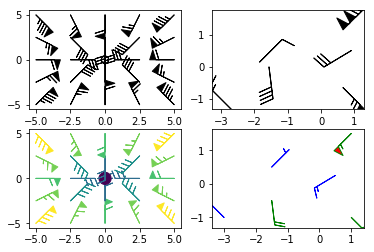

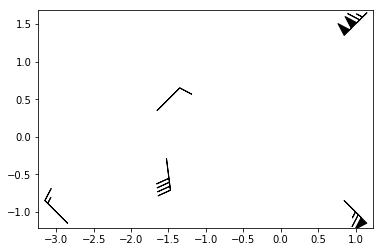

In [30]:
'''
Demonstration of wind barb plots
'''
import matplotlib.pyplot as plt
import numpy as np

x = np.linspace(-5, 5, 5)
X, Y = np.meshgrid(x, x)
U, V = 12*X, 12*Y

data = [(-1.5, .5, -6, -6),
        (1, -1, -46, 46),
        (-3, -1, 11, -11),
        (1, 1.5, 80, 80),
        (0.5, 0.25, 25, 15),
        (-1.5, -0.5, -5, 40)]

data = np.array(data, dtype=[('x', np.float32), ('y', np.float32),
                             ('u', np.float32), ('v', np.float32)])

# Default parameters, uniform grid
ax = plt.subplot(2, 2, 1)
ax.barbs(X, Y, U, V)

# Arbitrary set of vectors, make them longer and change the pivot point
#(point around which they're rotated) to be the middle
ax = plt.subplot(2, 2, 2)
ax.barbs(data['x'], data['y'], data['u'], data['v'], length=8, pivot='middle')

# Showing colormapping with uniform grid.  Fill the circle for an empty barb,
# don't round the values, and change some of the size parameters
ax = plt.subplot(2, 2, 3)
ax.barbs(X, Y, U, V, np.sqrt(U*U + V*V), fill_empty=True, rounding=False,
         sizes=dict(emptybarb=0.25, spacing=0.2, height=0.3))

# Change colors as well as the increments for parts of the barbs
ax = plt.subplot(2, 2, 4)
ax.barbs(data['x'], data['y'], data['u'], data['v'], flagcolor='r',
         barbcolor=['b', 'g'], barb_increments=dict(half=10, full=20, flag=100),
         flip_barb=True)

# Masked arrays are also supported
masked_u = np.ma.masked_array(data['u'])
masked_u[4] = 1000  # Bad value that should not be plotted when masked
masked_u[4] = np.ma.masked

# Identical plot to panel 2 in the first figure, but with the point at
#(0.5, 0.25) missing (masked)
fig2 = plt.figure()
ax = fig2.add_subplot(1, 1, 1)
ax.barbs(data['x'], data['y'], masked_u, data['v'], length=8, pivot='middle')

plt.show()


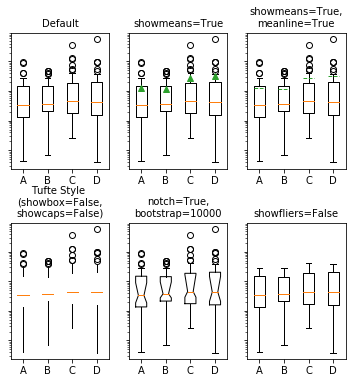

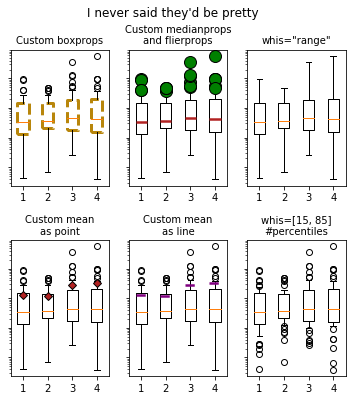

In [31]:
"""
=========================================
Demo of artist customization in box plots
=========================================

This example demonstrates how to use the various kwargs
to fully customize box plots. The first figure demonstrates
how to remove and add individual components (note that the
mean is the only value not shown by default). The second
figure demonstrates how the styles of the artists can
be customized. It also demonstrates how to set the limit
of the whiskers to specific percentiles (lower right axes)

A good general reference on boxplots and their history can be found
here: http://vita.had.co.nz/papers/boxplots.pdf

"""

import numpy as np
import matplotlib.pyplot as plt

# fake data
np.random.seed(937)
data = np.random.lognormal(size=(37, 4), mean=1.5, sigma=1.75)
labels = list('ABCD')
fs = 10  # fontsize

# demonstrate how to toggle the display of different elements:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, labels=labels)
axes[0, 0].set_title('Default', fontsize=fs)

axes[0, 1].boxplot(data, labels=labels, showmeans=True)
axes[0, 1].set_title('showmeans=True', fontsize=fs)

axes[0, 2].boxplot(data, labels=labels, showmeans=True, meanline=True)
axes[0, 2].set_title('showmeans=True,\nmeanline=True', fontsize=fs)

axes[1, 0].boxplot(data, labels=labels, showbox=False, showcaps=False)
tufte_title = 'Tufte Style \n(showbox=False,\nshowcaps=False)'
axes[1, 0].set_title(tufte_title, fontsize=fs)

axes[1, 1].boxplot(data, labels=labels, notch=True, bootstrap=10000)
axes[1, 1].set_title('notch=True,\nbootstrap=10000', fontsize=fs)

axes[1, 2].boxplot(data, labels=labels, showfliers=False)
axes[1, 2].set_title('showfliers=False', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.subplots_adjust(hspace=0.4)
plt.show()


# demonstrate how to customize the display different elements:
boxprops = dict(linestyle='--', linewidth=3, color='darkgoldenrod')
flierprops = dict(marker='o', markerfacecolor='green', markersize=12,
                  linestyle='none')
medianprops = dict(linestyle='-.', linewidth=2.5, color='firebrick')
meanpointprops = dict(marker='D', markeredgecolor='black',
                      markerfacecolor='firebrick')
meanlineprops = dict(linestyle='--', linewidth=2.5, color='purple')

fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(6, 6), sharey=True)
axes[0, 0].boxplot(data, boxprops=boxprops)
axes[0, 0].set_title('Custom boxprops', fontsize=fs)

axes[0, 1].boxplot(data, flierprops=flierprops, medianprops=medianprops)
axes[0, 1].set_title('Custom medianprops\nand flierprops', fontsize=fs)

axes[0, 2].boxplot(data, whis='range')
axes[0, 2].set_title('whis="range"', fontsize=fs)

axes[1, 0].boxplot(data, meanprops=meanpointprops, meanline=False,
                   showmeans=True)
axes[1, 0].set_title('Custom mean\nas point', fontsize=fs)

axes[1, 1].boxplot(data, meanprops=meanlineprops, meanline=True,
                   showmeans=True)
axes[1, 1].set_title('Custom mean\nas line', fontsize=fs)

axes[1, 2].boxplot(data, whis=[15, 85])
axes[1, 2].set_title('whis=[15, 85]\n#percentiles', fontsize=fs)

for ax in axes.flatten():
    ax.set_yscale('log')
    ax.set_yticklabels([])

fig.suptitle("I never said they'd be pretty")
fig.subplots_adjust(hspace=0.4)
plt.show()


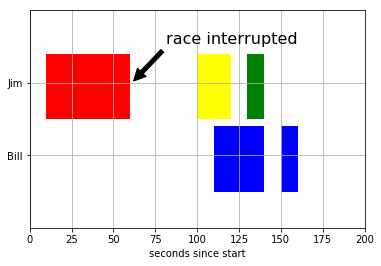

In [32]:
"""
Make a "broken" horizontal bar plot, i.e., one with gaps
"""
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.broken_barh([(110, 30), (150, 10)], (10, 9), facecolors='blue')
ax.broken_barh([(10, 50), (100, 20), (130, 10)], (20, 9),
               facecolors=('red', 'yellow', 'green'))
ax.set_ylim(5, 35)
ax.set_xlim(0, 200)
ax.set_xlabel('seconds since start')
ax.set_yticks([15, 25])
ax.set_yticklabels(['Bill', 'Jim'])
ax.grid(True)
ax.annotate('race interrupted', (61, 25),
            xytext=(0.8, 0.9), textcoords='axes fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontsize=16,
            horizontalalignment='right', verticalalignment='top')

plt.show()


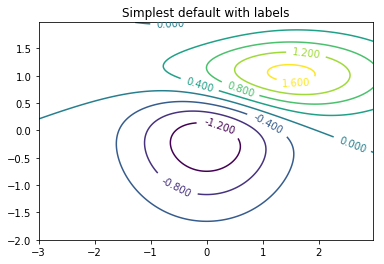

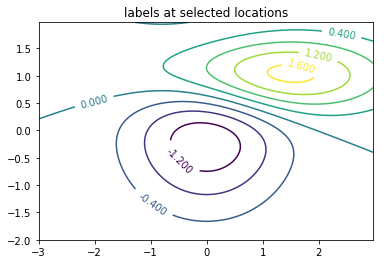

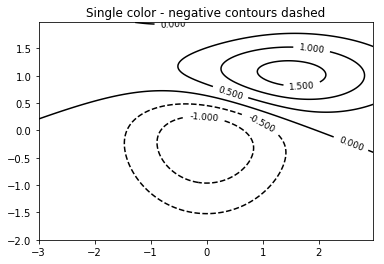

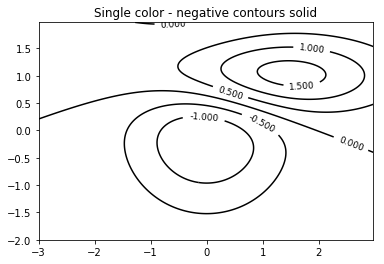

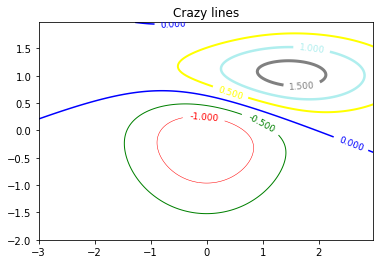

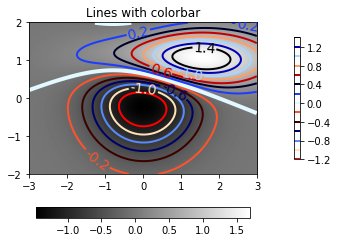

In [33]:
"""
Illustrate simple contour plotting, contours on an image with
a colorbar for the contours, and labelled contours.

See also contour_image.py.
"""
import matplotlib
import numpy as np
import matplotlib.cm as cm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

matplotlib.rcParams['xtick.direction'] = 'out'
matplotlib.rcParams['ytick.direction'] = 'out'

delta = 0.025
x = np.arange(-3.0, 3.0, delta)
y = np.arange(-2.0, 2.0, delta)
X, Y = np.meshgrid(x, y)
Z1 = mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
# difference of Gaussians
Z = 10.0 * (Z2 - Z1)


# Create a simple contour plot with labels using default colors.  The
# inline argument to clabel will control whether the labels are draw
# over the line segments of the contour, removing the lines beneath
# the label
plt.figure()
CS = plt.contour(X, Y, Z)
plt.clabel(CS, inline=1, fontsize=10)
plt.title('Simplest default with labels')


# contour labels can be placed manually by providing list of positions
# (in data coordinate). See ginput_manual_clabel.py for interactive
# placement.
plt.figure()
CS = plt.contour(X, Y, Z)
manual_locations = [(-1, -1.4), (-0.62, -0.7), (-2, 0.5), (1.7, 1.2), (2.0, 1.4), (2.4, 1.7)]
plt.clabel(CS, inline=1, fontsize=10, manual=manual_locations)
plt.title('labels at selected locations')


# You can force all the contours to be the same color.
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours dashed')

# You can set negative contours to be solid instead of dashed:
matplotlib.rcParams['contour.negative_linestyle'] = 'solid'
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 colors='k',  # negative contours will be dashed by default
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Single color - negative contours solid')


# And you can manually specify the colors of the contour
plt.figure()
CS = plt.contour(X, Y, Z, 6,
                 linewidths=np.arange(.5, 4, .5),
                 colors=('r', 'green', 'blue', (1, 1, 0), '#afeeee', '0.5')
                 )
plt.clabel(CS, fontsize=9, inline=1)
plt.title('Crazy lines')


# Or you can use a colormap to specify the colors; the default
# colormap will be used for the contour lines
plt.figure()
im = plt.imshow(Z, interpolation='bilinear', origin='lower',
                cmap=cm.gray, extent=(-3, 3, -2, 2))
levels = np.arange(-1.2, 1.6, 0.2)
CS = plt.contour(Z, levels,
                 origin='lower',
                 linewidths=2,
                 extent=(-3, 3, -2, 2))

# Thicken the zero contour.
zc = CS.collections[6]
plt.setp(zc, linewidth=4)

plt.clabel(CS, levels[1::2],  # label every second level
           inline=1,
           fmt='%1.1f',
           fontsize=14)

# make a colorbar for the contour lines
CB = plt.colorbar(CS, shrink=0.8, extend='both')

plt.title('Lines with colorbar')
#plt.hot()  # Now change the colormap for the contour lines and colorbar
plt.flag()

# We can still add a colorbar for the image, too.
CBI = plt.colorbar(im, orientation='horizontal', shrink=0.8)

# This makes the original colorbar look a bit out of place,
# so let's improve its position.

l, b, w, h = plt.gca().get_position().bounds
ll, bb, ww, hh = CB.ax.get_position().bounds
CB.ax.set_position([ll, b + 0.1*h, ww, h*0.8])


plt.show()


C:\Users\Prothomrobi\Anaconda3\lib\site-packages\numpy\core\numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


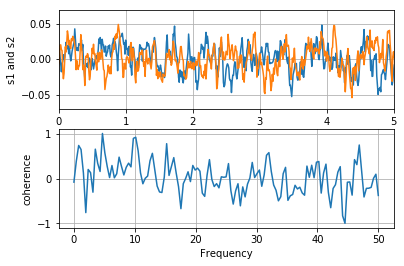

In [34]:
"""
Compute the coherence of two signals
"""
import numpy as np
import matplotlib.pyplot as plt

# make a little extra space between the subplots
plt.subplots_adjust(wspace=0.5)

dt = 0.01
t = np.arange(0, 30, dt)
nse1 = np.random.randn(len(t))                 # white noise 1
nse2 = np.random.randn(len(t))                 # white noise 2
r = np.exp(-t/0.05)

cnse1 = np.convolve(nse1, r, mode='same')*dt   # colored noise 1
cnse2 = np.convolve(nse2, r, mode='same')*dt   # colored noise 2

# two signals with a coherent part and a random part
s1 = 0.01*np.sin(2*np.pi*10*t) + cnse1
s2 = 0.01*np.sin(2*np.pi*10*t) + cnse2

plt.subplot(211)
plt.plot(t, s1, t, s2)
plt.xlim(0, 5)
plt.xlabel('time')
plt.ylabel('s1 and s2')
plt.grid(True)

plt.subplot(212)
cxy, f = plt.cohere(s1, s2, 256, 1./dt)
plt.ylabel('coherence')
plt.show()


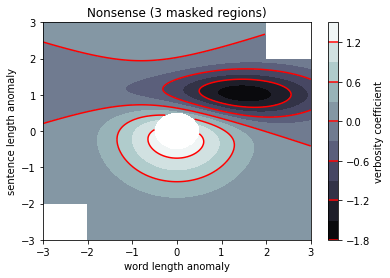

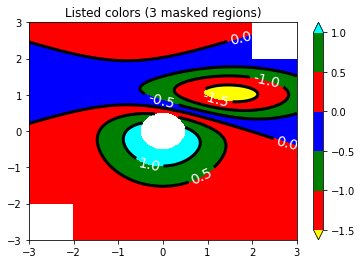

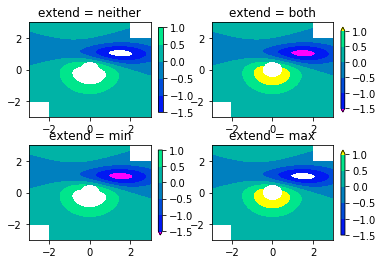

In [35]:
import numpy as np
import matplotlib.pyplot as plt

origin = 'lower'
#origin = 'upper'

delta = 0.025

x = y = np.arange(-3.0, 3.01, delta)
X, Y = np.meshgrid(x, y)
Z1 = plt.mlab.bivariate_normal(X, Y, 1.0, 1.0, 0.0, 0.0)
Z2 = plt.mlab.bivariate_normal(X, Y, 1.5, 0.5, 1, 1)
Z = 10 * (Z1 - Z2)

nr, nc = Z.shape

# put NaNs in one corner:
Z[-nr//6:, -nc//6:] = np.nan
# contourf will convert these to masked


Z = np.ma.array(Z)
# mask another corner:
Z[:nr//6, :nc//6] = np.ma.masked

# mask a circle in the middle:
interior = np.sqrt((X**2) + (Y**2)) < 0.5
Z[interior] = np.ma.masked

# We are using automatic selection of contour levels;
# this is usually not such a good idea, because they don't
# occur on nice boundaries, but we do it here for purposes
# of illustration.
CS = plt.contourf(X, Y, Z, 10,
                  #[-1, -0.1, 0, 0.1],
                  #alpha=0.5,
                  cmap=plt.cm.bone,
                  origin=origin)

# Note that in the following, we explicitly pass in a subset of
# the contour levels used for the filled contours.  Alternatively,
# We could pass in additional levels to provide extra resolution,
# or leave out the levels kwarg to use all of the original levels.

CS2 = plt.contour(CS, levels=CS.levels[::2],
                  colors='r',
                  origin=origin)

plt.title('Nonsense (3 masked regions)')
plt.xlabel('word length anomaly')
plt.ylabel('sentence length anomaly')

# Make a colorbar for the ContourSet returned by the contourf call.
cbar = plt.colorbar(CS)
cbar.ax.set_ylabel('verbosity coefficient')
# Add the contour line levels to the colorbar
cbar.add_lines(CS2)

plt.figure()

# Now make a contour plot with the levels specified,
# and with the colormap generated automatically from a list
# of colors.
levels = [-1.5, -1, -0.5, 0, 0.5, 1]
CS3 = plt.contourf(X, Y, Z, levels,
                   colors=('r', 'g', 'b'),
                   origin=origin,
                   extend='both')
# Our data range extends outside the range of levels; make
# data below the lowest contour level yellow, and above the
# highest level cyan:
CS3.cmap.set_under('yellow')
CS3.cmap.set_over('cyan')

CS4 = plt.contour(X, Y, Z, levels,
                  colors=('k',),
                  linewidths=(3,),
                  origin=origin)
plt.title('Listed colors (3 masked regions)')
plt.clabel(CS4, fmt='%2.1f', colors='w', fontsize=14)

# Notice that the colorbar command gets all the information it
# needs from the ContourSet object, CS3.
plt.colorbar(CS3)

# Illustrate all 4 possible "extend" settings:
extends = ["neither", "both", "min", "max"]
cmap = plt.cm.get_cmap("winter")
cmap.set_under("magenta")
cmap.set_over("yellow")
# Note: contouring simply excludes masked or nan regions, so
# instead of using the "bad" colormap value for them, it draws
# nothing at all in them.  Therefore the following would have
# no effect:
# cmap.set_bad("red")

fig, axs = plt.subplots(2, 2)
fig.subplots_adjust(hspace=0.3)

for ax, extend in zip(axs.ravel(), extends):
    cs = ax.contourf(X, Y, Z, levels, cmap=cmap, extend=extend, origin=origin)
    fig.colorbar(cs, ax=ax, shrink=0.9)
    ax.set_title("extend = %s" % extend)
    ax.locator_params(nbins=4)

plt.show()


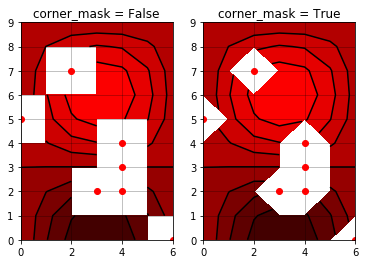

In [36]:
"""
Illustrate the difference between corner_mask=False and corner_mask=True
for masked contour plots.
"""
import matplotlib.pyplot as plt
import numpy as np

# Data to plot.
x, y = np.meshgrid(np.arange(7), np.arange(10))
z = np.sin(0.5*x)*np.cos(0.52*y)

# Mask various z values.
mask = np.zeros_like(z, dtype=np.bool)
mask[2, 3:5] = True
mask[3:5, 4] = True
mask[7, 2] = True
mask[5, 0] = True
mask[0, 6] = True
z = np.ma.array(z, mask=mask)

corner_masks = [False, True]
for i, corner_mask in enumerate(corner_masks):
    plt.subplot(1, 2, i+1)
    cs = plt.contourf(x, y, z, corner_mask=corner_mask)
    plt.contour(cs, colors='k')
    plt.title('corner_mask = {0}'.format(corner_mask))

    # Plot grid.
    plt.grid(c='k', ls='-', alpha=0.3)

    # Indicate masked points with red circles.
    plt.plot(np.ma.array(x, mask=~mask), y, 'ro')

plt.show()
